### Modelos Regressão Logistica e Árvore de decisão

Import Base

In [1]:
df = read.csv("C:\\Users\\Dani\\Documents\\TCC\\df_enem_r.csv")

In [2]:
head(df)

SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ESCOLA,TP_ENSINO,TP_LINGUA,TP_STATUS_REDACAO,Q001,...,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q027,Classificado
MG,17,M,0,1,4,1,0,1,E,...,B,E,B,B,E,B,D,B,D,0
PI,17,F,0,1,4,1,0,1,E,...,A,D,A,B,E,A,D,B,D,0
BA,23,M,0,1,1,1,1,1,B,...,A,B,A,A,B,A,B,B,D,0
SP,18,F,0,1,4,1,0,1,F,...,B,D,B,B,D,B,C,B,D,0
PE,20,F,0,3,1,1,1,1,D,...,A,B,A,A,C,B,B,B,A,0
SP,20,F,0,1,1,1,1,1,C,...,B,C,B,B,E,B,B,B,E,0


In [3]:
names(df)

[1] "SG_UF_RESIDENCIA"  "NU_IDADE"          "TP_SEXO"          
 [4] "TP_ESTADO_CIVIL"   "TP_COR_RACA"       "TP_ESCOLA"        
 [7] "TP_ENSINO"         "TP_LINGUA"         "TP_STATUS_REDACAO"
[10] "Q001"              "Q002"              "Q003"             
[13] "Q004"              "Q005"              "Q006"             
[16] "Q007"              "Q008"              "Q009"             
[19] "Q010"              "Q011"              "Q012"             
[22] "Q013"              "Q014"              "Q015"             
[25] "Q016"              "Q017"              "Q018"             
[28] "Q019"              "Q020"              "Q021"             
[31] "Q022"              "Q023"              "Q024"             
[34] "Q025"              "Q027"              "Classificado"

In [4]:
#ver tipos dos dados
str(df)

'data.frame':	1098311 obs. of  36 variables:
 $ SG_UF_RESIDENCIA : Factor w/ 27 levels "AC","AL","AM",..: 11 17 5 26 16 26 14 11 6 14 ...
 $ NU_IDADE         : num  17 17 23 18 20 20 20 24 18 19 ...
 $ TP_SEXO          : Factor w/ 2 levels "F","M": 2 1 2 1 1 1 2 1 2 2 ...
 $ TP_ESTADO_CIVIL  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ TP_COR_RACA      : int  1 1 1 1 3 1 3 3 3 3 ...
 $ TP_ESCOLA        : int  4 4 1 4 1 1 1 1 2 1 ...
 $ TP_ENSINO        : num  1 1 1 1 1 1 1 1 1 1 ...
 $ TP_LINGUA        : int  0 0 1 0 1 1 1 0 0 1 ...
 $ TP_STATUS_REDACAO: int  1 1 1 1 1 1 1 1 1 1 ...
 $ Q001             : Factor w/ 8 levels "A","B","C","D",..: 5 5 2 6 4 3 5 2 8 4 ...
 $ Q002             : Factor w/ 8 levels "A","B","C","D",..: 4 5 3 6 6 5 5 3 3 5 ...
 $ Q003             : Factor w/ 6 levels "A","B","C","D",..: 4 5 2 5 2 2 6 3 1 3 ...
 $ Q004             : Factor w/ 6 levels "A","B","C","D",..: 4 5 2 5 4 2 2 2 2 3 ...
 $ Q005             : int  4 4 4 2 3 5 4 9 4 4 ...
 $ Q006             : Factor w

In [5]:
##Converter para factor
df$TP_ESTADO_CIVIL <-as.factor(df$TP_ESTADO_CIVIL)
df$TP_COR_RACA <-as.factor(df$TP_COR_RACA)
df$TP_ESCOLA <-as.factor(df$TP_ESCOLA)
df$TP_ENSINO <-as.factor(df$TP_ENSINO)
df$TP_LINGUA <-as.factor(df$TP_LINGUA)
df$TP_STATUS_REDACAO <-as.factor(df$TP_STATUS_REDACAO)

In [6]:
#Verificar balanceamento (feito no python)
table(df$Classificado)
#table(treino$Classificado)
#table(teste$Classificado)


     0      1 
554684 543627 

In [7]:
#verificar os missings (tratamento feito no python)
apply(df, 2, function(x) any(is.na(x)))

SG_UF_RESIDENCIA          NU_IDADE           TP_SEXO   TP_ESTADO_CIVIL 
            FALSE             FALSE             FALSE             FALSE 
      TP_COR_RACA         TP_ESCOLA         TP_ENSINO         TP_LINGUA 
            FALSE             FALSE             FALSE             FALSE 
TP_STATUS_REDACAO              Q001              Q002              Q003 
            FALSE             FALSE             FALSE             FALSE 
             Q004              Q005              Q006              Q007 
            FALSE             FALSE             FALSE             FALSE 
             Q008              Q009              Q010              Q011 
            FALSE             FALSE             FALSE             FALSE 
             Q012              Q013              Q014              Q015 
            FALSE             FALSE             FALSE             FALSE 
             Q016              Q017              Q018              Q019 
            FALSE             FALSE             FALSE             FALSE 
             Q020              Q021              Q022              Q023 
            FALSE             FALSE             FALSE             FALSE 
             Q024              Q025              Q027      Classificado 
            FALSE             FALSE             FALSE             FALSE

In [8]:
#Dividir em treino e teste
set.seed(123)
dt = sort(sample(nrow(df), nrow(df)*.7))
treino<-df[dt,]
teste<-df[-dt,]

In [9]:
#Calcular o IV (Information Value)
install.packages("Information")
library(Information)
results="hide"

package 'Information' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Dani\AppData\Local\Temp\Rtmp02CMYn\downloaded_packages


Warning message:
"package 'Information' was built under R version 3.6.3"Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [10]:
IV <- create_infotables(data=df,y="Classificado", ncore=2)
print(IV)

$Tables
$Tables$SG_UF_RESIDENCIA
   SG_UF_RESIDENCIA      N     Percent         WOE          IV
1                AC   9839 0.008958301  0.55253954 0.002674703
2                AL  22126 0.020145478  0.42303991 0.006234640
3                AM  28019 0.025510989  0.53707568 0.013440391
4                AP   9231 0.008404723  0.49810310 0.015488621
5                BA  86841 0.079067769  0.19995748 0.018642659
6                CE  72978 0.066445661  0.33154263 0.025892214
7                DF  19735 0.017968499 -0.29800123 0.027473842
8                ES  21299 0.019392504 -0.21123082 0.028334991
9                GO  36167 0.032929653  0.08336308 0.028563796
10               MA  56370 0.051324261  0.57011816 0.044853847
11               MG 105749 0.096283293 -0.40090222 0.060094411
12               MS  13437 0.012234240  0.10517565 0.060229692
13               MT  19224 0.017503239  0.38363614 0.062779489
14               PA  67545 0.061498974  0.35452160 0.070442603
15               PB  3

"IV Fracos Excluidos"  
(Levandado em consideração artigo publicado no SAS Global Forum de 2013, denominado “Variable Reduction in SAS by Using Weight of Evidence and Information Value“ e contido no material do professor Marcelo Fernandes)

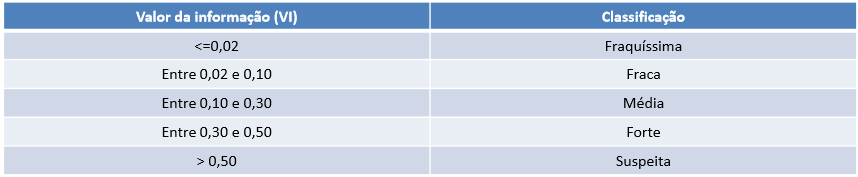
Q009 0.066646607  
TP_ENSINO 0.062773489  
NU_IDADE 0.049005700  
Q005 0.034398622  
Q012 0.025026461  
TP_ANO_CONCLUIU 0.024118214  
Q015 0.021239569  
Q007 0.019206478  
TP_ST_CONCLUSAO 0.017006294  
TP_STATUS_REDACAO 0.013317625  
Q017 0.011725064  
TP_SEXO 0.010465830  
TP_ESTADO_CIVIL 0.009801096  
Q020 0.006254042  
Q011 0.002647429  

#Modelo inicial
#Todas as variaveis com IV médio e seleção backward
options(scipen = 999)
modelo1 <- glm(Classificado ~
              +Q006
              +Q024
              +Q027
              +Q003
              +Q001
              #+Q004_5
              +Q002
              #+Q010_6
              +Q008
              +Q022
              +Q025
              #+TP_ESCOLA_2
              #+Q016_4
              #+Q019_10
              +Q018
              #+SG_UF_RESIDENCIA_1
              #+Q014_8
              #+Q013_9
              +Q023
              +TP_LINGUA
              +Q021,
              #+TP_COR_RACA,_3
              family=binomial(link="logit"),data=treino)
summary(modelo1)

In [11]:
#Terceiro modelo IF > 0.2 
options(scipen = 999)
modelo <- glm(Classificado ~
               +Q006
               +Q024
               +Q027
               +Q003
               +Q001
               +Q004
               +Q002
               +Q010
               +Q008,
               #+Q022
               #+Q025
               #TP_ESCOLA
               #+Q016
               #+Q019
               #+Q018
               #+SG_UF_RESIDENCIA
               #+Q014
               #+Q013
               #+Q023
               #+TP_LINGUA
               #+Q021
               #+TP_COR_RACA,
               family=binomial(link="logit"),data=treino)
summary(modelo)


Call:
glm(formula = Classificado ~ +Q006 + Q024 + Q027 + Q003 + Q001 + 
    Q004 + Q002 + Q010 + Q008, family = binomial(link = "logit"), 
    data = treino)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0062  -1.0793  -0.2673   1.0000   2.7788  

Coefficients:
             Estimate Std. Error z value             Pr(>|z|)    
(Intercept)  0.394508   0.080935   4.874 0.000001091537577502 ***
Q006CB       0.224914   0.080766   2.785              0.00536 ** 
Q006CC       0.620589   0.076566   8.105 0.000000000000000526 ***
Q006CD       0.921369   0.076937  11.976 < 0.0000000000000002 ***
Q006CE       1.341238   0.076982  17.423 < 0.0000000000000002 ***
Q024B       -0.515175   0.005511 -93.480 < 0.0000000000000002 ***
Q024C       -0.864927   0.013904 -62.205 < 0.0000000000000002 ***
Q024D       -0.942467   0.030216 -31.191 < 0.0000000000000002 ***
Q024E       -0.999687   0.053551 -18.668 < 0.0000000000000002 ***
Q027B       -0.213615   0.010600 -20.152 < 0.0000000

In [12]:
summary(modelo)$coefficients[,1]

(Intercept)      Q006CB      Q006CC      Q006CD      Q006CE       Q024B 
 0.39450842  0.22491418  0.62058904  0.92136899  1.34123823 -0.51517473 
      Q024C       Q024D       Q024E       Q027B       Q027C       Q027D 
-0.86492650 -0.94246743 -0.99968686 -0.21361499 -0.55190998 -1.15644302 
      Q027E       Q027F       Q003B       Q003C       Q003D       Q003E 
-1.20194407 -0.23596716 -0.18191230 -0.27445745 -0.44122246 -0.27503404 
      Q003F       Q001B       Q001C       Q001D       Q001E       Q001F 
-0.06092554 -0.18523632 -0.24412725 -0.26858483 -0.35675562 -0.54577911 
      Q001G       Q001H       Q004B       Q004C       Q004D       Q004E 
-0.36101928 -0.24781503 -0.16375369 -0.19949281 -0.22856798 -0.11764344 
      Q004F       Q002B       Q002C       Q002D       Q002E       Q002F 
-0.03250798 -0.27507429 -0.35267253 -0.38978905 -0.49825874 -0.60651734 
      Q002G       Q002H       Q010B       Q010C       Q010D       Q010E 
-0.48935572  0.13322866 -0.07537728 -0.04687871  0.24398940  0.44179763 
      Q008B       Q008C       Q008D       Q008E 
-0.26794660 -0.30347874 -0.29184034 -0.34382092

In [13]:
exp(modelo$coefficients)

(Intercept)      Q006CB      Q006CC      Q006CD      Q006CE       Q024B 
  1.4836547   1.2522152   1.8600234   2.5127279   3.8237753   0.5973962 
      Q024C       Q024D       Q024E       Q027B       Q027C       Q027D 
  0.4210825   0.3896652   0.3679947   0.8076593   0.5758489   0.3146032 
      Q027E       Q027F       Q003B       Q003C       Q003D       Q003E 
  0.3006092   0.7898066   0.8336745   0.7599843   0.6432496   0.7595463 
      Q003F       Q001B       Q001C       Q001D       Q001E       Q001F 
  0.9408933   0.8309079   0.7833879   0.7644606   0.6999435   0.5793902 
      Q001G       Q001H       Q004B       Q004C       Q004D       Q004E 
  0.6969656   0.7805043   0.8489511   0.8191461   0.7956722   0.8890130 
      Q004F       Q002B       Q002C       Q002D       Q002E       Q002F 
  0.9680147   0.7595157   0.7028073   0.6771997   0.6075877   0.5452465 
      Q002G       Q002H       Q010B       Q010C       Q010D       Q010E 
  0.6130212   1.1425112   0.9273935   0.9542031   1.2763308   1.5555009 
      Q008B       Q008C       Q008D       Q008E 
  0.7649486   0.7382456   0.7468878   0.7090559

In [14]:
#Calcular o VIF - Verificar possivel multicolineariedade
#VIF>5 já revela sinais de multicolinearidade
install.packages("car")
library(car)
vif(modelo)


  There is a binary version available but the source version is later:
    binary source needs_compilation
car  3.0-9 3.0-10             FALSE



installing the source package 'car'

Loading required package: carData
Warning message:
"package 'carData' was built under R version 3.6.3"

,GVIF,Df,GVIF^(1/(2*Df))
Q006,1.960854,4,1.087817
Q024,1.419992,4,1.044806
Q027,1.266426,5,1.023901
Q003,4.249687,5,1.155675
Q001,3.756114,7,1.099139
Q004,3.955078,5,1.147402
Q002,3.510955,7,1.093853
Q010,1.577208,4,1.058610
Q008,1.547500,4,1.056097


Sem sinais de multicolineariedade no modelo

In [15]:
#Tabela de classificação
install.packages("caret")
install.packages("e1071")
library(caret)
library(e1071)

also installing the dependencies 'ellipsis', 'pillar', 'glue', 'tibble', 'dplyr', 'tidyselect', 'rlang', 'tidyr', 'ModelMetrics', 'recipes'



package 'ellipsis' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'ellipsis'"Warning message:
"restored 'ellipsis'"

package 'pillar' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'pillar'"Warning message:
"restored 'pillar'"

package 'glue' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'glue'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\ProgramData\Anaconda3\Lib\R\library\00LOCK\glue\libs\x64\glue.dll to C:\ProgramData\Anaconda3\Lib\R\library\glue\libs\x64\glue.dll: Permission denied"Warning message:
"restored 'glue'"

package 'tibble' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'tibble'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\ProgramData\Anaconda3\Lib\R\library\00LOCK\tibble\libs\x64\tibble.dll to C:\ProgramData\Anaconda3\Lib\R\library\tibble\libs\x64\tibble.dll: Permission denied"Warning message:
"restored 'tibble'"

package 'dplyr' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'dplyr'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\ProgramData\Anaconda3\Lib\R\library\00LOCK\dplyr\libs\x64\dplyr.dll to C:\ProgramData\Anaconda3\Lib\R\library\dplyr\libs\x64\dplyr.dll: Permission denied"Warning message:
"restored 'dplyr'"

package 'tidyselect' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'tidyselect'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\ProgramData\Anaconda3\Lib\R\library\00LOCK\tidyselect\libs\x64\tidyselect.dll to C:\ProgramData\Anaconda3\Lib\R\library\tidyselect\libs\x64\tidyselect.dll: Permission denied"Warning message:
"restored 'tidyselect'"

package 'rlang' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'rlang'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\ProgramData\Anaconda3\Lib\R\library\00LOCK\rlang\libs\x64\rlang.dll to C:\ProgramData\Anaconda3\Lib\R\library\rlang\libs\x64\rlang.dll: Permission denied"Warning message:
"restored 'rlang'"

package 'tidyr' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'tidyr'"Warning message:
"restored 'tidyr'"

package 'ModelMetrics' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'ModelMetrics'"Warning message:
"restored 'ModelMetrics'"

package 'recipes' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'recipes'"Warning message:
"restored 'recipes'"

package 'caret' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'caret'"Warning message:
"restored 'caret'"


The downloaded binary packages are in
	C:\Users\Dani\AppData\Local\Temp\Rtmp02CMYn\downloaded_packages
package 'e1071' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Dani\AppData\Local\Temp\Rtmp02CMYn\downloaded_packages


Loading required package: lattice
Loading required package: ggplot2
Warning message:
"package 'e1071' was built under R version 3.6.3"

In [16]:
#Probabilidade estimada - Treino
#Calcula os valores preditos
pred_treino = predict(modelo,treino, type = "response")
#Cria uma nova base com a base original+valores preditos
base_treino = cbind(treino, pred_treino)
#Criar a resposta final usando o ponto de corte
base_treino$resposta <- as.factor(ifelse(base_treino$pred>0.5, 1, 0))
#View(base_treino)

In [17]:
#Treino
base_treino$Classificado <- as.factor(base_treino$Classificado) #Formatar Classificado em factor
confusionMatrix(base_treino$resposta,base_treino$Classificado)

Confusion Matrix and Statistics

          Reference
Prediction      0      1
         0 237159 108372
         1 151027 272259
                                               
               Accuracy : 0.6626               
                 95% CI : (0.6615, 0.6637)     
    No Information Rate : 0.5049               
    P-Value [Acc > NIR] : < 0.00000000000000022
                                               
                  Kappa : 0.3259               
                                               
 Mcnemar's Test P-Value : < 0.00000000000000022
                                               
            Sensitivity : 0.6109               
            Specificity : 0.7153               
         Pos Pred Value : 0.6864               
         Neg Pred Value : 0.6432               
             Prevalence : 0.5049               
         Detection Rate : 0.3085               
   Detection Prevalence : 0.4494               
      Balanced Accuracy : 0.6631               
        

In [18]:
#Probabilidade estimada - Teste
#Calcula os valores preditos
pred_teste = predict(modelo,teste, type = "response")
#Cria uma nova base com a base original+valores preditos
base_teste = cbind(teste, pred_teste)
#Criar a resposta final usando o ponto de corte
base_teste$resposta <- as.factor(ifelse(base_teste$pred>0.5, 1, 0))
#View(base_treino)

In [19]:
#Teste
base_teste$Classificado <- as.factor(base_teste$Classificado) #Formatar Classificado em factor
confusionMatrix(base_teste$resposta,base_teste$Classificado)

Confusion Matrix and Statistics

          Reference
Prediction      0      1
         0 101980  46430
         1  64518 116566
                                               
               Accuracy : 0.6633               
                 95% CI : (0.6617, 0.6649)     
    No Information Rate : 0.5053               
    P-Value [Acc > NIR] : < 0.00000000000000022
                                               
                  Kappa : 0.3273               
                                               
 Mcnemar's Test P-Value : < 0.00000000000000022
                                               
            Sensitivity : 0.6125               
            Specificity : 0.7151               
         Pos Pred Value : 0.6872               
         Neg Pred Value : 0.6437               
             Prevalence : 0.5053               
         Detection Rate : 0.3095               
   Detection Prevalence : 0.4504               
      Balanced Accuracy : 0.6638               
        

#### Cálculo do AUC (Área sob a curva) e curva ROC

In [20]:
install.packages("ROCR")
install.packages("pROC")
library(ROCR)
library(pROC)

package 'ROCR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Dani\AppData\Local\Temp\Rtmp02CMYn\downloaded_packages
package 'pROC' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Dani\AppData\Local\Temp\Rtmp02CMYn\downloaded_packages


Warning message:
"package 'ROCR' was built under R version 3.6.3"Warning message:
"package 'pROC' was built under R version 3.6.3"Type 'citation("pROC")' for a citation.

Attaching package: 'pROC'

The following objects are masked from 'package:stats':

    cov, smooth, var



In [21]:
#Treino
ROCRpred<- prediction(pred_treino,base_treino$Classificado)
ROCRperf <- performance(ROCRpred, "tpr","fpr")
roc_obj <- roc(base_treino$Classificado,base_treino$pred_treino)
auc(roc_obj)

Setting levels: control = 0, case = 1
Setting direction: controls < cases


Area under the curve: 0.7237

In [23]:
#Teste
ROCRpred<- prediction(pred_teste,base_teste$Classificado)
ROCRperf <- performance(ROCRpred, "tpr","fpr")
roc_obj <- roc(base_teste$Classificado,base_teste$pred_teste)
auc(roc_obj)

Setting levels: control = 0, case = 1
Setting direction: controls < cases


Area under the curve: 0.7247

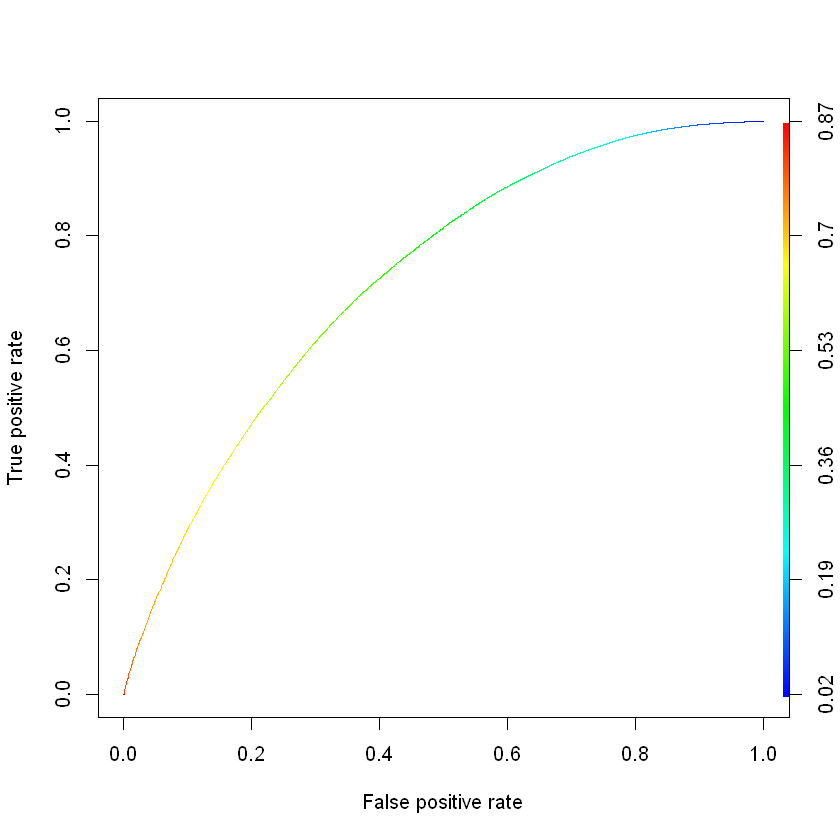

In [24]:
plot(ROCRperf, colorize=TRUE, text.adj = c(-0.2,1.7))

### *****Árvore  de decisão ***** 
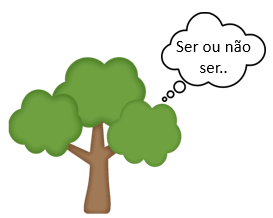

In [25]:
#***#Arvore decisão*****

#install.packages('dplyr')
install.packages('rpart')
install.packages('rpart.plot')
install.packages('rattle')
include=FALSE 

package 'rpart' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'rpart'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\ProgramData\Anaconda3\Lib\R\library\00LOCK\rpart\libs\x64\rpart.dll to C:\ProgramData\Anaconda3\Lib\R\library\rpart\libs\x64\rpart.dll: Permission denied"Warning message:
"restored 'rpart'"


The downloaded binary packages are in
	C:\Users\Dani\AppData\Local\Temp\Rtmp02CMYn\downloaded_packages
package 'rpart.plot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Dani\AppData\Local\Temp\Rtmp02CMYn\downloaded_packages
package 'rattle' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Dani\AppData\Local\Temp\Rtmp02CMYn\downloaded_packages


In [26]:
library(dplyr)
library(readr)
library(rpart)
library(rpart.plot)
library(xtable)
library(rattle)


Attaching package: 'dplyr'

The following object is masked from 'package:car':

    recode

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'rpart.plot' was built under R version 3.6.3"Warning message:
"package 'rattle' was built under R version 3.6.3"Loading required package: tibble
Loading required package: bitops
Rattle: A free graphical interface for data science with R.
Version 5.4.0 Copyright (c) 2006-2020 Togaware Pty Ltd.
Type 'rattle()' to shake, rattle, and roll your data.


In [27]:
treino$Classificado <- ifelse(test=treino$Classificado == 0, yes="Classificado", no="Desclassificado")
treino$Classificado <- as.factor(treino$Classificado) # Now convert to a factor
teste$Classificado <- ifelse(test=teste$Classificado == 0, yes="Classificado", no="Desclassificado")
teste$Classificado <- as.factor(teste$Classificado) # Now convert to a factor

In [28]:
modelo_dt <- rpart(as.factor(Classificado) ~ Q006+Q024+Q027+Q003+Q001+Q004+Q002+Q010+Q008, data=treino)

In [ ]:
#modelo_dt <- rpart(as.factor(Classificado) ~ ., data=treino)

In [ ]:
#modelo_dt <- rpart(as.factor(Classificado) ~ Q006 + Q024 + Q027 + Q003 + Q001 + Q002 + Q008 + Q022 + Q025 + Q018 + Q023 + TP_LINGUA + Q021,data=treino) 

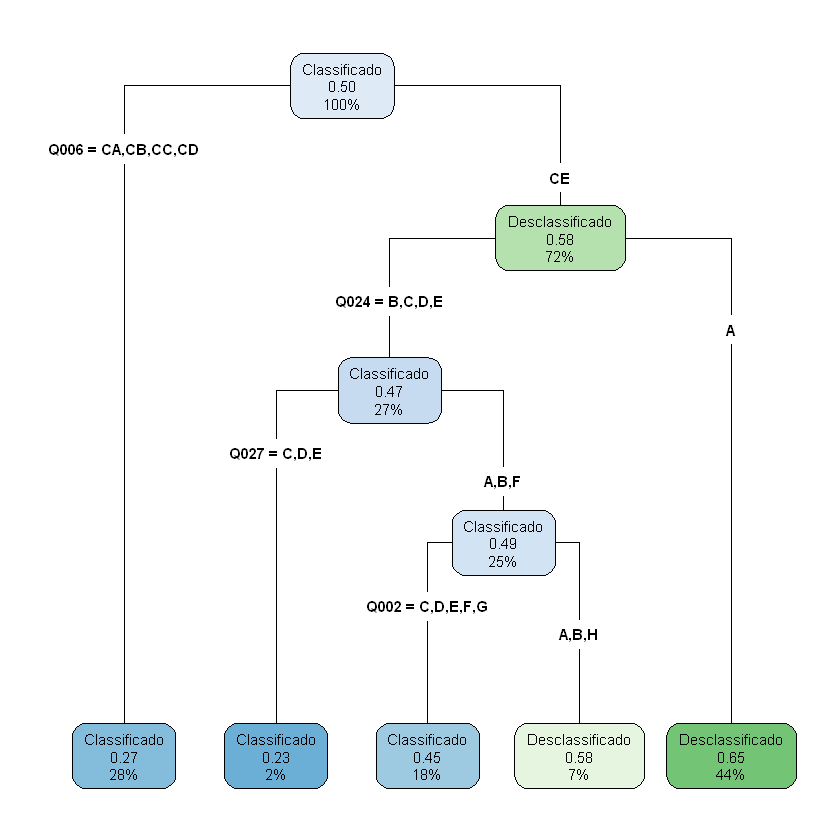

In [29]:
rpart.plot(modelo_dt,type = 4,extra= "auto")

In [30]:
#Probabilidade estimada - Treino
#Calcula os valores preditos
pred_treino = predict(modelo_dt,treino,type = "class")
#treino$Classificado <- as.factor(treino$Classificado) # Now convert to a factor
confusionMatrix(pred_treino, treino$Classificado)

Confusion Matrix and Statistics

                 Reference
Prediction        Classificado Desclassificado
  Classificado          247257          126358
  Desclassificado       140929          254273
                                               
               Accuracy : 0.6523               
                 95% CI : (0.6513, 0.6534)     
    No Information Rate : 0.5049               
    P-Value [Acc > NIR] : < 0.00000000000000022
                                               
                  Kappa : 0.3049               
                                               
 Mcnemar's Test P-Value : < 0.00000000000000022
                                               
            Sensitivity : 0.6370               
            Specificity : 0.6680               
         Pos Pred Value : 0.6618               
         Neg Pred Value : 0.6434               
             Prevalence : 0.5049               
         Detection Rate : 0.3216               
   Detection Prevalence : 0.486

In [31]:
#Probabilidade estimada - Teste
#Calcula os valores predito
pred_teste = predict(modelo_dt,teste,type = "class")
#teste$Classificado <- as.factor(teste$Classificado) # Now convert to a factor
confusionMatrix(pred_teste, teste$Classificado)

Confusion Matrix and Statistics

                 Reference
Prediction        Classificado Desclassificado
  Classificado          106459           54057
  Desclassificado        60039          108939
                                               
               Accuracy : 0.6537               
                 95% CI : (0.6521, 0.6553)     
    No Information Rate : 0.5053               
    P-Value [Acc > NIR] : < 0.00000000000000022
                                               
                  Kappa : 0.3076               
                                               
 Mcnemar's Test P-Value : < 0.00000000000000022
                                               
            Sensitivity : 0.6394               
            Specificity : 0.6684               
         Pos Pred Value : 0.6632               
         Neg Pred Value : 0.6447               
             Prevalence : 0.5053               
         Detection Rate : 0.3231               
   Detection Prevalence : 0.487

### Curva ROC - Arvore de decisão

#### Treino

Setting levels: control = Classificado, case = Desclassificado
Setting direction: controls < cases


Area under the curve: 0.6779


Setting levels: control = Classificado, case = Desclassificado
Setting direction: controls < cases


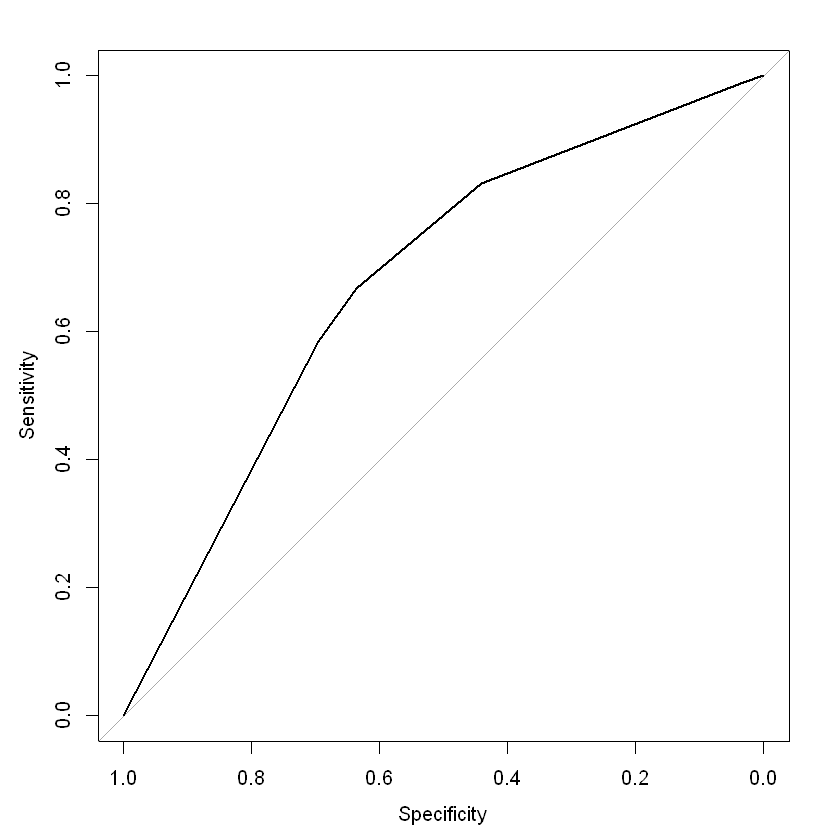

In [32]:
pred_treino_prob = predict(modelo_dt,treino,type = "prob")
auc_treino <- auc(treino$Classificado, pred_treino_prob[,2])
print(auc_treino)
plot(roc(treino$Classificado, pred_treino_prob[,2]))

#### Teste

In [33]:
pred_teste_prob = predict(modelo_dt,teste,type = "prob")
auc_teste <- auc(teste$Classificado, pred_teste_prob[,2])
print(auc_treino)

Setting levels: control = Classificado, case = Desclassificado
Setting direction: controls < cases


Area under the curve: 0.6779


### Tunar Hiperparametro k-fold = 5

In [ ]:
#library(caret)

In [ ]:
fitControl <- trainControl(method = "cv",number = 5)

In [ ]:
ajuste_dt <- train(as.factor(Classificado) ~ Q006+Q024+Q027+Q003+Q001+Q004+Q002+Q010+Q008, 
                     data = treino, 
                     method = "rpart", 
                     trControl = fitControl)

In [ ]:
print(ajuste_dt)